In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from numpy import mean
from qiskit import execute
from numpy import pi
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq.managed import IBMQJobManager
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
provider2 = IBMQ.get_provider(hub='ibm-q-pnnl', group='internal', project='default')
print(provider2.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>]


In [3]:
mybackend = provider2.get_backend('ibmq_casablanca')
largebackend = provider2.get_backend('ibmq_toronto')
simbackend = provider2.get_backend('ibmq_qasm_simulator')

In [4]:
config = mybackend.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibmq_casablanca, and is on version 1.2.48. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


In [5]:
config = largebackend.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibmq_toronto, and is on version 1.6.8. It has 27 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


In [17]:
k = list(range(27))
print(k)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [6]:
def nobarrier( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.cx(q[list[2]], q[list[1]])
    # circuit2.barrier(q[list[0]])
    # circuit2.barrier(q[list[1]])
    # circuit2.barrier(q[list[2]])
    # circuit2.barrier(q[list[3]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]
    string = string[:list[1]] + '0' + string[list[1] + 1:]
    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    #job_exp = execute(circuit2, simback, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    
    counts = result.get_counts()
    print(counts)
    error_rate = 1 - counts[string] / shots
    return error_rate


In [9]:
def barrier( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.barrier()
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    shots = 20000
    string = "000000"

    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1 - counts[string] / shots
    return error_rate


In [10]:
from numpy import mean
list = [1,3,4,5]
nocross = []
cross = []
for x in range(2):
    cur = barrier(list)
    cur2 = nobarrier(list)
    nocross.append(cur)
    cross.append(cur2)
    print(f"no cross error rate {cur}")
    print(f"cross error rate {cur2}")

print(f"no cross average error rate {mean(nocross)}")
print(f" cross average error rate {mean(cross)}")

110010
Job Status: job has successfully run
{'000000': 4, '010000': 37, '010010': 666, '011000': 3, '011010': 68, '000010': 141, '100000': 3, '100010': 278, '101000': 4, '101010': 118, '110000': 682, '110010': 17056, '111000': 65, '111010': 482, '001000': 20, '001010': 373}
111010
Job Status: job has successfully run
no cross error rate 0.1472
cross error rate 0.12339999999999995
110010
Job Status: job has successfully run
{'000000': 81, '010000': 44, '010010': 598, '011000': 19, '011010': 173, '000010': 1008, '100000': 139, '100010': 1949, '101000': 18, '101010': 150, '110000': 1032, '110010': 13498, '111000': 87, '111010': 647, '001000': 41, '001010': 516}
111010
Job Status: job has successfully run
no cross error rate 0.32509999999999994
cross error rate 0.16785000000000005
no cross average error rate 0.23614999999999997
 cross average error rate 0.145625


In [16]:
def largecircuitwithbarrier( mylist ):
    q = QuantumRegister(7, 'q')
    c = ClassicalRegister(7, 'c')
    circuit2 = QuantumCircuit(q, c)
    #add large circuit with bit flip and cx gates, finally we flip back
    flipnumber = 16
    for i in range(flipnumber):
        circuit2.x(q[0])
        circuit2.x(q[4])
        circuit2.cx(q[0],q[1])
        circuit2.cx(q[4],q[5])
    # circuit2.x(q[0])
    # circuit2.x(q[4])
    circuit2.x(q[mylist[0]])
    circuit2.x(q[mylist[2]])
    circuit2.cx(q[mylist[0]], q[mylist[1]])
    circuit2.barrier()
    circuit2.cx(q[mylist[2]], q[mylist[3]])
    circuit2.measure(q[mylist[0]],c[mylist[0]])
    circuit2.measure(q[mylist[1]],c[mylist[1]])
    circuit2.measure(q[mylist[2]],c[mylist[2]])
    circuit2.measure(q[mylist[3]],c[mylist[3]])
    #circuit2.draw(output = 'mpl')
    shots = 20000
    string = "0" * 7

    for i in mylist:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5,6])
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1 - counts[string] / shots
    return error_rate


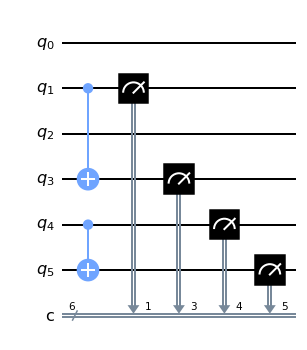

In [45]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(6, 'c')
circuit2 = QuantumCircuit(q, c)

# flipnumber = 8
# for i in range(flipnumber):
#     circuit2.x(q[0])
#     circuit2.x(q[4])
#     circuit2.cx(q[0],q[1])
#     circuit2.cx(q[4],q[5])
#     # circuit2.x(q[0])
#     # circuit2.x(q[4])
#     # circuit2.barrier(q[list[0]])
#     # circuit2.barrier(q[list[1]])
#     # circuit2.barrier(q[list[2]])
#     # circuit2.barrier(q[list[3]])
# circuit2.x(q[list[0]])
# circuit2.x(q[list[2]])
circuit2.cx(q[list[0]], q[list[1]])
circuit2.cx(q[list[2]], q[list[3]])
circuit2.measure(q[list[0]],c[list[0]])
circuit2.measure(q[list[1]],c[list[1]])
circuit2.measure(q[list[2]],c[list[2]])
circuit2.measure(q[list[3]],c[list[3]])
circuit2.draw(output='mpl')

In [46]:
tc = transpile(circuit2,backend=mybackend,initial_layout=[0,1,2,3,4,5],optimization_level=0)
tc.draw()
#ob_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5,6])
from qiskit.providers.ibmq.managed import IBMQJobManager
job_manager = IBMQJobManager()
result = job_manager.run(tc,backend=mybackend)


/Users/feihua/Anaconda/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/managed/managedjob.py:145: UserWarning: Unable to submit job for experiments 0-5: 'bad input to assemble() function; must be either circuits or schedules'
  warnings.warn("Unable to submit job for experiments {}-{}: {}".format(


In [49]:
from qiskit.providers.jobstatus import JobStatus
job = mybackend.run(tc,shots=20000)

try:
    job_result = job.result()  # It will block until the job finishes.
    print("The job finished with counts {}".format(job_result.get_counts()))
except JobError as ex:
    print("Something wrong happened!: {}".format(ex))

The job finished with counts {'000000': 18715, '010000': 101, '000010': 173, '100000': 281, '100010': 1, '101000': 169, '101010': 2, '110000': 243, '110010': 2, '111000': 8, '111010': 1, '001000': 243, '001010': 61}


In [52]:
counts = job_result.get_counts()
print(1-counts['000000']/20000)

0.06425000000000003


In [56]:
def withbarrier(list):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    # circuit2.x(q[list[0]])
    # circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.barrier()
    circuit2.cx(q[list[2]], q[list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    shots = 20000
    string = "000000"

    # for i in list:
    #     string = string[:i] + '1' + string[i + 1:]

    # string = string[::-1]
    print(string)
    tc = transpile(circuit2,backend=mybackend,initial_layout=[0,1,2,3,4,5],optimization_level=0)
    job = mybackend.run(tc,shots=20000)
    #job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job)
    result = job.result()
    counts = result.get_counts()
    error_rate = 1 - counts[string] / shots
    return error_rate


In [58]:
def withoutbarrier(list):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    # circuit2.x(q[list[0]])
    # circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.cx(q[list[2]], q[list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    shots = 20000
    string = "000000"

    # for i in list:
    #     string = string[:i] + '1' + string[i + 1:]

    # string = string[::-1]
    #print(string)
    
    #job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    tc = transpile(circuit2,backend=mybackend,initial_layout=[0,1,2,3,4,5],optimization_level=0)
    job = mybackend.run(tc,shots=20000)
    job_monitor(job)
    result = job.result()
    counts = result.get_counts()
    error_rate = 1 - counts[string] / shots
    return error_rate


In [59]:
list = [1,3,4,5]
nocross = []
cross = []
for x in range(10):
    cur = withbarrier(list)
    cur2 = withoutbarrier(list)
    nocross.append(cur)
    cross.append(cur2)
    print(f"no cross error rate {cur}")
    print(f"cross error rate {cur2}")

print(f"no cross average error rate {mean(nocross)}")
print(f" cross average error rate {mean(cross)}")

000000
Job Status: job has successfully run
Job Status: job has successfully run
no cross error rate 0.05489999999999995
cross error rate 0.05930000000000002
000000
Job Status: job has successfully run
Job Status: job has successfully run
no cross error rate 0.05545
cross error rate 0.059599999999999986
000000
Job Status: job has successfully run
Job Status: job has successfully run
no cross error rate 0.05735000000000001
cross error rate 0.05625000000000002
000000
Job Status: job has successfully run
Job Status: job has successfully run
no cross error rate 0.050000000000000044
cross error rate 0.05459999999999998
000000
Job Status: job has successfully run
Job Status: job has successfully run
no cross error rate 0.05405000000000004
cross error rate 0.05710000000000004
000000
Job Status: job has successfully run
Job Status: job has successfully run
no cross error rate 0.05500000000000005
cross error rate 0.058699999999999974
000000
Job Status: job has successfully run
Job Status: job h

In [14]:
def largecircuitnobarrier( list ):
    q = QuantumRegister(7, 'q')
    c = ClassicalRegister(7, 'c')
    circuit2 = QuantumCircuit(q, c)
    flipnumber = 16
    for i in range(flipnumber):
        circuit2.x(q[0])
        circuit2.x(q[4])
        circuit2.cx(q[0],q[1])
        circuit2.cx(q[4],q[5])
    circuit2.barrier()
    # circuit2.barrier(q[list[0]])
    # circuit2.barrier(q[list[1]])
    # circuit2.barrier(q[list[2]])
    # circuit2.barrier(q[list[3]])
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.cx(q[list[2]], q[list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "0000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]
    #string = string[:list[1]] + '0' + string[list[1] + 1:]
    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5,6])
    #job_exp = execute(circuit2, simback, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    
    counts = result.get_counts()
    print(counts)
    error_rate = 1 - counts[string] / shots
    return error_rate


In [17]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
list = [1,3,4,5]
nocross = []
cross = []
for x in range(2):
    cur = largecircuitwithbarrier(list)
    cur2 = largecircuitnobarrier(list)
    nocross.append(cur)
    cross.append(cur2)
    print(f"no cross error rate {cur}")
    print(f"cross error rate {cur2}")
s = ''.join(str(e) for e in list)
s1 = ' , '.join(str(e) for e in nocross)
s2 = ' , '.join(str(e) for e in cross)
with open(f"/Users/feihua/pythonfile/crosstalk/Crosstalk/result/{s}.txt",'a+') as f:
    f.write(f"nocrosstalk errors:{s1}")
    f.write('\n')
    f.write(f"crosstalk errors:{s2}")
print(f"no cross average error rate {mean(nocross)}")
print(f" cross average error rate {mean(cross)}")

0111010
Job Status: job has successfully run
0111010
Job Status: job has successfully run
{'0000000': 288, '0010000': 249, '0010010': 55, '0011000': 35, '0011010': 1120, '0000010': 67, '0100000': 394, '0100010': 88, '0101000': 41, '0101010': 1669, '0110000': 2627, '0110010': 416, '0111000': 314, '0111010': 11399, '0001000': 48, '0001010': 1190}
no cross error rate 0.45830000000000004
cross error rate 0.43005000000000004
0111010
Job Status: job has successfully run
0111010
Job Status: job has successfully run
{'0000000': 197, '0010000': 250, '0010010': 71, '0011000': 30, '0011010': 1191, '0000010': 50, '0100000': 303, '0100010': 85, '0101000': 41, '0101010': 1456, '0110000': 2210, '0110010': 404, '0111000': 319, '0111010': 12325, '0001000': 36, '0001010': 1032}
no cross error rate 0.39680000000000004
cross error rate 0.38375000000000004
no cross average error rate 0.42755000000000004
 cross average error rate 0.40690000000000004


In [50]:
s = ''.join(str(e) for e in list)
with open(f"/Users/feihua/pythonfile/crosstalk/Crosstalk/result/{s}.txt",'a+') as f:
    f.write(f"nocrosstalk errors:{s1}")
    f.write('\n')
    f.write(f"crosstalk errors:{s2}")


In [29]:
testlist = [1,2,3,5]
largelist = [0,1,2,3]
nocross = []
for x in range(10):
    cur = largetest(largelist)
    nocross.append(cur)
    print(cur)
print(nocross)
print(mean(nocross))

000000000000000000000001111
Job Status: job has successfully run
0.27015
000000000000000000000001111
Job Status: job has successfully run
0.27885000000000004
000000000000000000000001111
Job Status: job has successfully run
0.25654999999999994
000000000000000000000001111
Job Status: job has successfully run
0.26815
000000000000000000000001111
Job Status: job has successfully run
0.2502
000000000000000000000001111
Job Status: job has successfully run
0.24944999999999995
000000000000000000000001111
Job Status: job has successfully run
0.25225
000000000000000000000001111
Job Status: job has successfully run
0.25485
000000000000000000000001111
Job Status: job has successfully run
0.25385
000000000000000000000001111
Job Status: job has successfully run
0.25970000000000004
[0.27015, 0.27885000000000004, 0.25654999999999994, 0.26815, 0.2502, 0.24944999999999995, 0.25225, 0.25485, 0.25385, 0.25970000000000004]
0.25939999999999996


In [38]:
def crosstest( mylist ):
    q = QuantumRegister(27, 'q')
    c = ClassicalRegister(27, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[mylist[0]])
    circuit2.x(q[mylist[2]])
    circuit2.x(q[6])
    circuit2.cx(q[6],q[7])
    circuit2.cx(q[7],q[10])
    circuit2.cx(q[mylist[0]], q[mylist[1]])
    #circuit2.barrier()
    circuit2.cx(q[mylist[2]], [mylist[3]])
    circuit2.measure(q[mylist[0]],c[mylist[0]])
    circuit2.measure(q[mylist[1]],c[mylist[1]])
    circuit2.measure(q[mylist[2]],c[mylist[2]])
    circuit2.measure(q[mylist[3]],c[mylist[3]])
    #circuit2.draw(output = 'mpl')
    shots = 20000
    string = "0" * 27

    for i in mylist:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    ini = list(range(27))
    job_exp = execute(circuit2, largebackend, shots=shots, initial_layout=ini)
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    #print(counts)
    error_rate = 1-counts[string] / shots
    return error_rate


In [41]:
nocross = []
cross = []
for x in range(20):
    cur = crosstest(largelist)
    cur2 = largetest(largelist)
    nocross.append(cur2)
    cross.append(cur)
    print(f"crosstalk error is {cur}")
    print(f"no crosstalk error is {cur2}")
print(nocross)
print(mean(nocross))
print(mean(cross))

000000000000000000000001111
Job Status: job has successfully run
000000000000000000000001111
Job Status: job has successfully run
crosstalk error is 0.23945000000000005
no crosstalk error is 0.25844999999999996
000000000000000000000001111
Job Status: job has successfully run
000000000000000000000001111
Job Status: job has successfully run
crosstalk error is 0.23509999999999998
no crosstalk error is 0.27675000000000005
000000000000000000000001111
Job Status: job has successfully run
000000000000000000000001111
Job Status: job has successfully run
crosstalk error is 0.23795
no crosstalk error is 0.27315
000000000000000000000001111
Job Status: job has successfully run
000000000000000000000001111
Job Status: job has successfully run
crosstalk error is 0.23795
no crosstalk error is 0.2753
000000000000000000000001111
Job Status: job has successfully run
000000000000000000000001111
Job Status: job is queued (1)     

KeyboardInterrupt: 

In [10]:
def ctest( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    # circuit2.barrier(q[list[0]])
    # circuit2.barrier(q[list[1]])
    # circuit2.barrier(q[list[2]])
    # circuit2.barrier(q[list[3]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1-counts[string] / shots
    return error_rate


In [52]:
nocross = []
for x in range(10):
    cur = stest(testlist)
    nocross.append(cur)
    print(cur)
print(nocross)
print(mean(nocross))

111010
Job Status: job has successfully run
0.1263427734375
111010
Job Status: job has successfully run
0.1368408203125
111010
Job Status: job has successfully run
0.1373291015625
111010
Job Status: job has successfully run
0.1483154296875
111010
Job Status: job has successfully run
0.1285400390625
111010
Job Status: job has successfully run
0.112060546875
111010
Job Status: job has successfully run
0.15478515625
111010
Job Status: job has successfully run
0.1082763671875
111010
Job Status: job has successfully run
0.1162109375
111010
Job Status: job has successfully run
0.1116943359375
111010
Job Status: job has successfully run
0.112548828125
111010
Job Status: job has successfully run
0.1116943359375
111010
Job Status: job has successfully run
0.1124267578125
111010
Job Status: job has successfully run
0.1357421875
111010
Job Status: job has successfully run
0.1044921875
111010
Job Status: job has successfully run
0.111083984375
111010
Job Status: job has successfully run
0.16638183

In [15]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(20):
    cur = stest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("without crosstalk")
print(mean(nocross))


101110
Job Status: job is queued (1)     

KeyboardInterrupt: 

In [12]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(20):
    cur = ctest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("with crosstalk")
print(mean(nocross))

101110
Job Status: job has successfully run
0.12980000000000003
101110
Job Status: job has successfully run
0.10340000000000005
101110
Job Status: job has successfully run
0.12360000000000004
101110
Job Status: job has successfully run
0.13315
101110
Job Status: job has successfully run
0.11750000000000005
101110
Job Status: job has successfully run
0.1008
101110
Job Status: job has successfully run
0.10585
101110
Job Status: job has successfully run
0.12429999999999997
101110
Job Status: job has successfully run
0.16595000000000004
101110
Job Status: job has successfully run
0.11695
101110
Job Status: job has successfully run
0.11260000000000003
101110
Job Status: job has successfully run
0.10880000000000001
101110
Job Status: job has successfully run
0.11395
101110
Job Status: job has successfully run
0.11595
101110
Job Status: job has successfully run
0.12070000000000003
101110
Job Status: job has successfully run
0.11755000000000004
101110
Job Status: job has successfully run
0.118

In [88]:
def circuit( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.barrier()
    circuit2.cx(q[list[0]], q[list[1]])
    # circuit2.barrier()
    
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    return circuit2

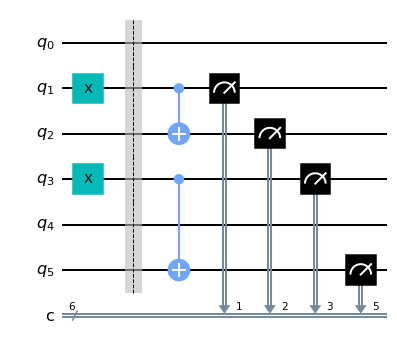

In [89]:
circuit3 = circuit([1,2,3,5])
circuit3.draw()

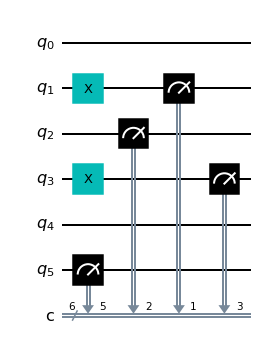

In [84]:
circuit3 = transpile(circuit3)
circuit3.draw()

In [85]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
# circuit3 = circuit3.decompose()
circuit3.draw()
print(circuit3.depth())

2


In [51]:
import pdb
def eztest( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    # circuit2.x(q[list[0]])
    # circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    # circuit2.barrier(q[list[0]])
    # circuit2.barrier(q[list[1]])
    # circuit2.barrier(q[list[2]])
    # circuit2.barrier(q[list[3]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5],optimization_level=None)
    job_monitor(job_exp)
    result = job_exp.result()
    pdb.set_trace()
    counts = result.get_counts()
    error_rate = 1-counts[string] / shots
    return error_rate

In [45]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(1):
    cur = stest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("with crosstalk")
print(mean(nocross))

101110
Job Status: job has successfully run
Traceback (most recent call last):
  File "/tmp/ipykernel_132/3678075466.py", line 8, in <module>
    cur = eztest(test3)
  File "/tmp/ipykernel_132/195097898.py", line 30, in eztest
    error_rate = 1-counts[string] / shots
KeyError: '101110'

Use %tb to get the full traceback.


In [40]:
def ectest( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    # circuit2.x(q[list[0]])
    # circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.barrier(q[list[0]])
    circuit2.barrier(q[list[1]])
    circuit2.barrier(q[list[2]])
    circuit2.barrier(q[list[3]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5],optimization_level=None)
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1-counts[string] / shots
    return error_rate

In [41]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(1):
    cur = ectest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("with crosstalk")
print(mean(nocross))

101110
Job Status: job has successfully run
0.99995
[0.99995]
with crosstalk
0.99995
